# 1. Import Python libraries and packages

Import key Python libraries and packages that you will need to process and analyze your financial data.

In the cell below, add the appropriate statements to import Pandas and Numpy libraries. We will not import Mathplotlib and use Pandas to plot our graph.

In [ ]:
#@title
#Import Python libraries
import numpy as np
import pandas as pd

# 2. The prior probability of default

Assume you work at a hedge fund that buys high yielding debt of companies with weak credit ratings because they offer attractive risk-adjusted returns. These debt offerings are also known as junk bonds because of their risky nature.

Your fund evaluates the credit risk of these companies using their proprietary methods. If your fund believes that there is only a 10% chance of the company defaulting, they buy the junk bonds at market rates that compensates them for the risk they are taking.

Your fund also uses machine learning algorithms to search various data sources for information relating to the companies in their portfolio. These items could include earnings releases, press releases, analyst reports, bond market analyses, sentiment surveys and the like. As soon as it receives each piece of information about a company, the ML algorithm immediately classifies it as either a positive or negative rating for the company.

You have been assigned by your portfolio manager to develop an algorithm that takes advantage of these proprietary resources to update the probabilities of default of a company as soon as new information is processed by your ML classification system. If your are successful developing this algorithm, your fund will have an edge in the timing and direction of their trading strategies.

In the cell below, create a dataframe named bonds with index = (Default, No Default). Also, create a new column called Prior and assign the two outcomes the appropriate prior probabilities.

In [ ]:
#Create a dataframe for your bond analysis
bonds = pd.DataFrame(index=['Default', 'No Default'])

#The prior probability of default
#P(Default) = 0.10 and P(No Default) = 0.90
bonds['Prior'] = 0.1, 0.90
bonds

,Prior
Default,0.1
No Default,0.9


#3. The likelihood of observing negative ratings assuming default

Over the years, your fund's ML classification algorithm has built a very valuable proprietary database of the vital information characteristics of these risky borrowers. In particular, it has found that companies that eventually default on their debt accumulate 70% negative ratings. However, companies which do not default, only accumulate 40% negative ratings.

The likelihood function gives you the **conditional probability** of observing data assuming a particular hypothesis is valid. Note that this is called a function and not a probability distribution because it is conditioned on different hypothesis and so its values do not add up to 1.

In the cell below, create a new column in your bonds dataframe called Likeli_Neg and assign the appropriate values to the two hypotheses (default/no default).


In [ ]:
#The likelihood functions for observing negative ratings
#P(Negative|Default) = 0.7 and P(Negative|No Default) = 0.4
bonds['Likeli_Neg'] = 0.70, 0.4
bonds

,Prior,Likeli_Neg
Default,0.1,0.7
No Default,0.9,0.4


# 4. Marginal likelihood of observing negative ratings regardless of default

Just because the ML classifier may give some new information about the company a negative rating, doesn't necessarily mean the company will eventually default. Recall that the ML algorithm also gives negative ratings, albeit at a lower rate, to companies that don't eventually default.

The probability of observing the data based on any scenario is called the marginal likelihood function. Summing over all possible hypotheses or scenarios gives you the total probability of observing the data.

In the cell below, compute the **joint probabilities** of seeing a negative rating under different hypotheses and put it in a new column called 'Joint1'. Add all the joint probabilities in that column to get the **marginal probability** or total (unconditional) probability of observing the data (prob_neg_data).

In [ ]:
#Joint probabilities of seeing a negative rating depending on default or no default
#P(Negative|Default) * P(Default) and P(Negative|No Default) * P(No Default)
bonds['Joint1'] = bonds['Likeli_Neg'] * bonds['Prior']
#Add the joint probabilities to get the marginal likelihood or unconditional probability of observing a negative rating
#P(Negative) = P(Negative|Default) * P(Default) + P(Negative|No Default) * P(No Default)
prob_neg_data = bonds['Joint1'].sum()
bonds

,Prior,Likeli_Neg,Joint1
Default,0.1,0.7,0.07
No Default,0.9,0.4,0.36


# 5. Posterior Probability of default

Your ML algorithm has just alerted you of a negative rating for one such company, XYZ, you are monitoring. You have to update the probability of default of this company based on the new negative rating.

In the cell below, create a new column called Posterior1. Use the inverse probability theorem to calculate the updated probability of default based on the new negative rating.

In [ ]:
#Use the inverse probability rule to calculate the updated probability of default based on the new negative rating.
bonds['Posterior1'] = bonds['Likeli_Neg'] * bonds['Prior']/prob_neg_data
bonds.round(2)

,Prior,Likeli_Neg,Joint1,Posterior1
Default,0.1,0.7,0.07,0.16
No Default,0.9,0.4,0.36,0.84


# 6. Continually updating the probability of default given new information

A few days later, your ML classifier alerts you to another negative rating about XYZ company. What is your updated prior probability? Likelihood function? Joint probabilities? Marginal probability of the data? Think about it before you start coding.

In the cell below, update XYZ's the probability of default. Create a new column in the dataframe and name it Posterior2.

In [ ]:
#Our new prior probability is our previous posterior probability, Posterior1.

bonds['Joint2'] = bonds['Likeli_Neg'] * bonds['Posterior1']
prob_neg_data = bonds['Joint2'].sum()
bonds['Posterior2'] = bonds['Likeli_Neg'] * bonds['Posterior1']/prob_neg_data
bonds.round(2)

,Prior,Likeli_Neg,Joint1,Posterior1,Joint2,Posterior2
Default,0.1,0.7,0.07,0.16,0.11,0.25
No Default,0.9,0.4,0.36,0.84,0.33,0.75


# 7. Making decisions under uncertainty

The probability of default has gone up substantially in light of new information about the company and is approaching the fund's risk limit. You decide to bring these results to the attention of the portfolio manager who can do a more in-depth, holistic analysis of XYZ company and the market environment. For simplicity, in this problem we are only dealing with point estimates for default and the likelihood functions. In the real world, we have to deal with a range of estimates or distributions.

Before you call a meeting, you need to create a graph of the changing probability estimates of default of XYZ company. In the cell below, put the Prior, Posterior1 and Posterior2 probabilities of default in a simple table and then plot the same table using the appropriate Pandas methods.

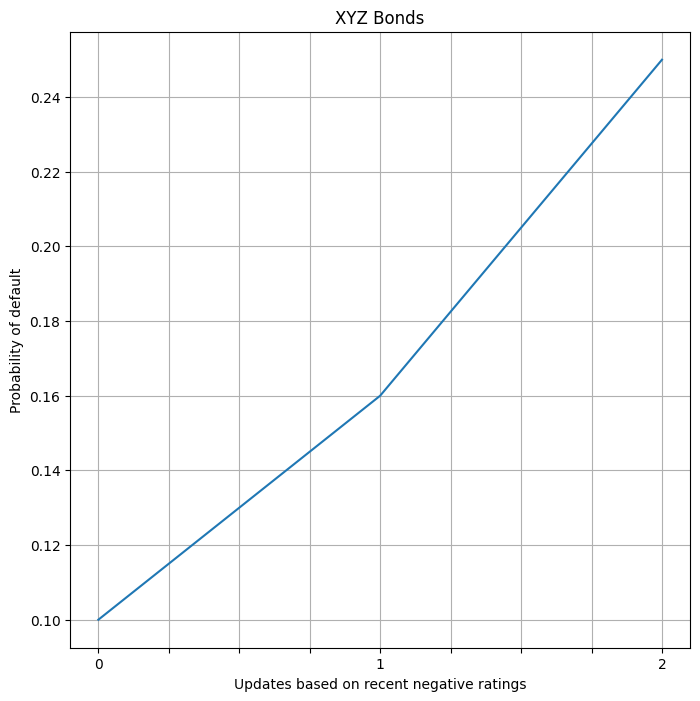

In [ ]:
#Create a new table so that you can plot a graph with the appropriate information
table = bonds[['Prior', 'Posterior1', 'Posterior2']].round(2)

#Change columns so that x axis is the number of negative ratings
table.columns = ['0', '1', '2']

#The row to plot in the graph
default_row = table.iloc[0]
default_row.plot(figsize = (8,8), grid = True, xlabel = 'Updates based on recent negative ratings', ylabel = 'Probability of default', title = 'XYZ Bonds');

# Module 5 Challenge: Conclusions

When it bought the junk bonds of XYZ company, your fund used it's institutional knowledge and assigned 10% as the probability of default. Of course it's insights are subjective - it's unique perspective on trading junk bonds gives your fund its competitive advantage.

By using the Inverse Probability/Bayes rule, you were able to update this prior probability of default in a manner that was consistent with your fund's institutional knowledge and the new information that your ML classifier generated. You also showed how you can consistently incorporate new information with previous knowledge on an ongoing basis to quantify the uncertainty of XYZ company defaulting using probability estimates.

The Inverse Probability Rule enables you to logically infer causes (such as the possiblilty of a company in the process of defaulting on its debt obligations) from the effects/symptoms of those causes (company is generating negative signals) while incorporating your previous knowledge or opinions about those causes. More importantly, it does it in a way that quantifies the degree of plausibility of such a causal inference since multiple causes can explain the given observations.